# Bishop’s University
## Department of Computer Science
### CS462/562
### HW3 – Edge detection and evaluation
#### -----------------------------------
#### Agathe Legault
#### -----------------------------------


#### choose threshold values for every image

In [372]:
thresLevels = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3]

In [373]:
import numpy as np
import matplotlib.pyplot as plt
from skimage. color import rgb2gray
import skimage as ski
from skimage import filters
from scipy.io import loadmat
from scipy.ndimage import convolve

import warnings
warnings.filterwarnings('ignore')



## Man Image (189080)

#### Read image

In [374]:
# read input image
X = ski.io.imread('189080.jpg')
# size
X.shape

(481, 321, 3)

#### Display Image

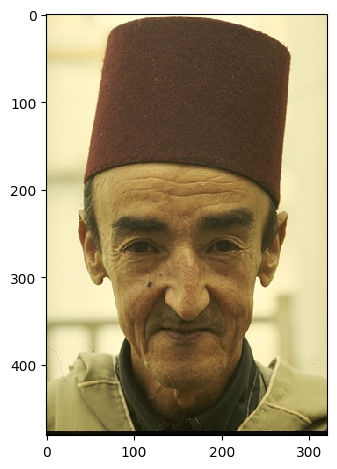

In [375]:
# Display it
ski.io.imshow(X)

#### Read Groud Truth Image

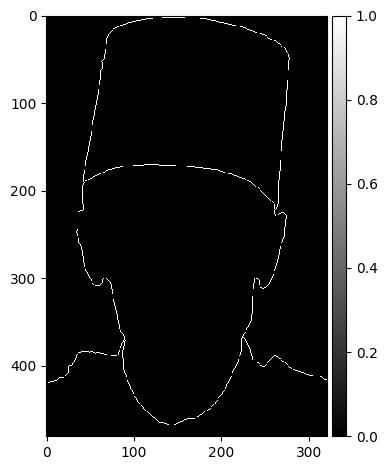

In [376]:
# read the ground-truth edge
annots = loadmat('189080.mat')['groundTruth']
gt = annots[0][0][0][0][1]
ski.io.imshow(gt, cmap="gray")

In [377]:
# make sure edge image is B/W  or (0/1)
np.unique(gt)

array([0, 1], dtype=uint8)

#### Convert to GrayScale

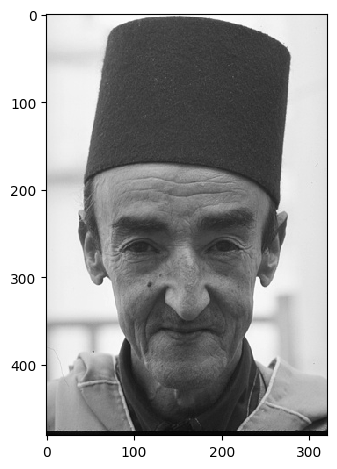

In [378]:
# convert RGB image to grayscale image
imgGray = rgb2gray(X)
ski.io.imshow(imgGray)

#### Edge Detection Functions

In [379]:
# your code
import cv2 as cv

def roberts(img, thres):
    gx = np.array([[1, 0], [0, -1]])
    gy = np.array([[0, 1], [-1, 0]])

    rob_x = convolve(img, gx)
    rob_y = convolve(img, gy)

    mag = np.sqrt(rob_x**2 + rob_y**2)

    edges = mag > thres
    return edges

def sobel(img, thres):
    gx = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    gy = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

    sobel_x = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=3)
    sobel_y = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=3)

    mag = np.sqrt(sobel_x**2 + sobel_y**2)

    edges = mag > thres
    return edges

#### Apply different thresholds to each method

In [380]:
# Threshold edge detection output with different levlel of thresholds

def applyThres(img, thresLevels):
    sobRes = []
    robRes = []

    for thres in thresLevels:
        sobRes.append(sobel(img, thres))
        robRes.append(roberts(img, thres))

    return sobRes, robRes

sobRes, robRes = applyThres(imgGray, thresLevels)

#### Display results of each function

<Figure size 640x480 with 0 Axes>

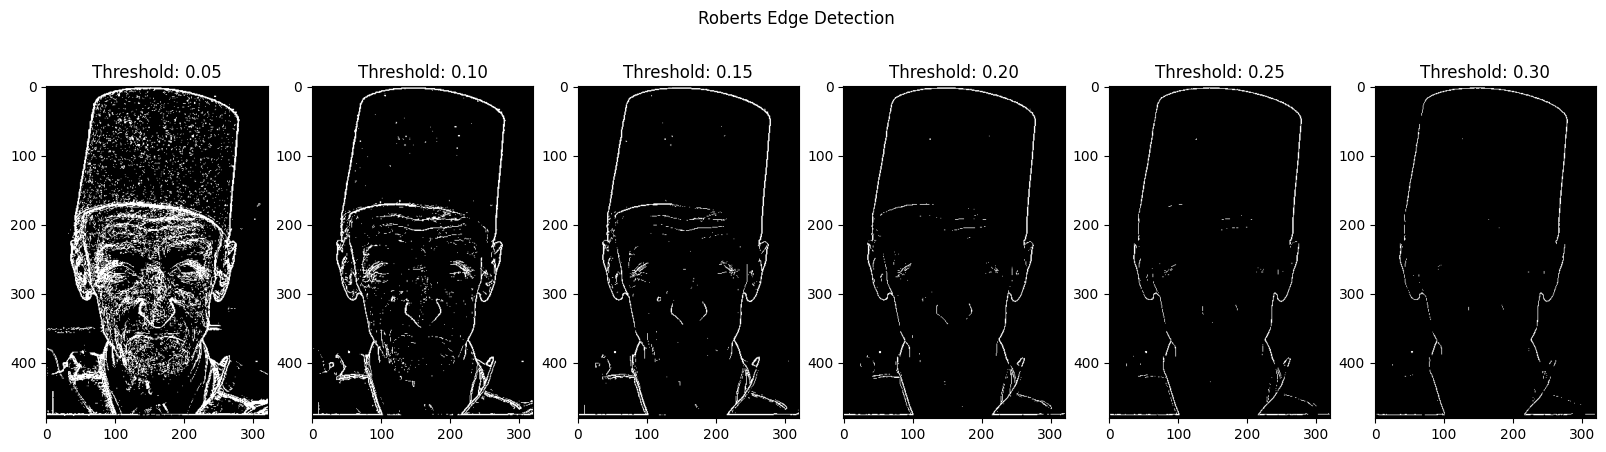

<Figure size 640x480 with 0 Axes>

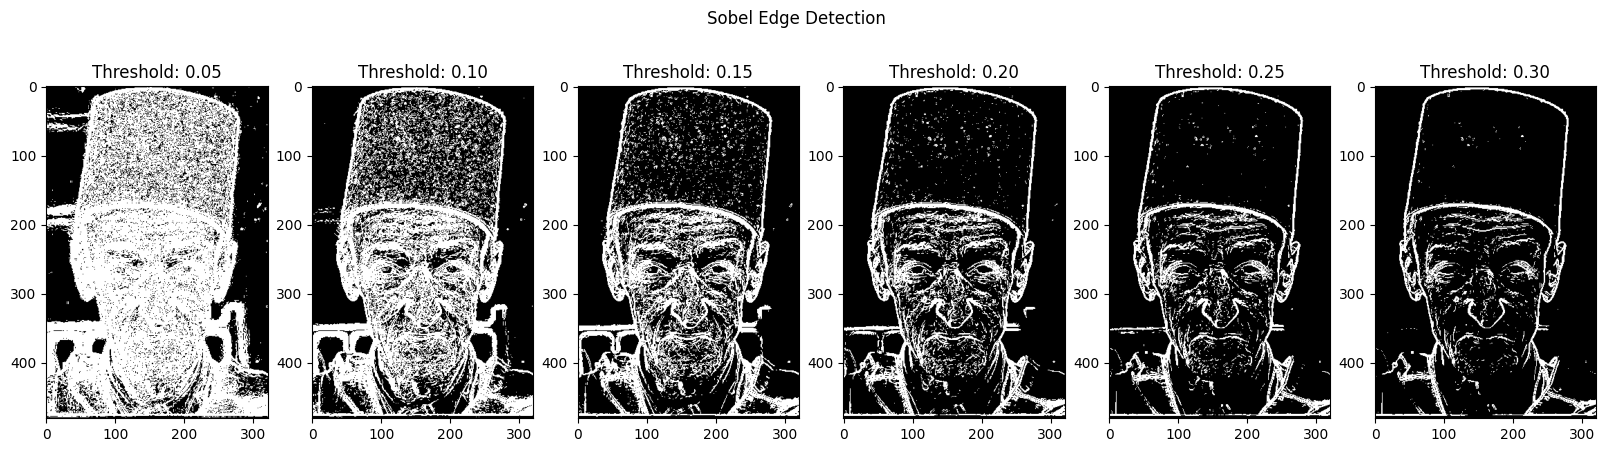

In [381]:
from matplotlib import pyplot as plt

def display_edges(sobRes, robRes, thresLevels):
    plt.figure()
    fig, axarr = plt.subplots(1, len(thresLevels))
    fig.set_size_inches(20, 5)
    fig.suptitle("Roberts Edge Detection")

    for i in range(0,len(thresLevels)):
        threshold = thresLevels[i]
        axarr[i].imshow(robRes[i], cmap="gray")
        axarr[i].set_title("Threshold: %.2f" % threshold)

    plt.figure()
    fig, axarr = plt.subplots(1, len(thresLevels))
    fig.set_size_inches(20, 5)
    fig.suptitle("Sobel Edge Detection")

    for i in range(0,len(thresLevels)):
        threshold = thresLevels[i]
        axarr[i].imshow(sobRes[i], cmap="gray")
        axarr[i].set_title("Threshold: %.2f" % threshold)

display_edges(sobRes, robRes, thresLevels)


#### Get Calculations

In [382]:
def confusionMat(images):
    tp = []
    tn = []
    fp = []
    fn = []

    for img in images:
        tp_mask = np.logical_and(gt == 1, img == 1)
        tp.append(np.sum(tp_mask))

        tn_mask = np.logical_and(gt == 0, img == 0)
        tn.append(np.sum(tn_mask))

        fp_mask = np.logical_and(gt == 0, img == 1)
        fp.append(np.sum(fp_mask))

        fn_mask = np.logical_and(gt == 1, img == 0)
        fn.append(np.sum(fn_mask))

    return [tp, tn, fp, fn]

def precision(matrix, length):
    precision = []
    for i in range(0, length):
        precision.append(matrix[0][i]/(matrix[0][i] + matrix[2][i]))

    return precision

def recall(matrix, length):
    recall = []
    for i in range(0, length):
        recall.append(matrix[0][i]/(matrix[0][i] + matrix[3][i]))

    return recall

def f_score(precision, recall, length):
    score = []
    for i in range(0, length):
        score.append((2 * precision[i] * recall[i])/(precision[i] + recall[i]))

    return score

def FP_rate(matrix, length):
    rate = []
    for i in range(0, length):
        rate.append(matrix[2][i]/(matrix[1][i] + matrix[2][i]))

    return rate

def getAllCalcs(images):
    calcs = []

    matrix = confusionMat(images)
    calcs.append(matrix)

    prec = precision(matrix, len(thresLevels))
    calcs.append(prec)

    rec = recall(matrix, len(thresLevels))
    calcs.append(rec)

    f1 = f_score(prec, rec, len(thresLevels))
    calcs.append(f1)

    fpr = FP_rate(matrix, len(thresLevels))
    calcs.append(fpr)

    return calcs

sobel_calc = getAllCalcs(sobRes)
roberts_calc = getAllCalcs(robRes)

#### Print Calculations

In [383]:
def print_calc(calcs, levels):
    for i in range(0, len(levels)):
        thres = levels[i]
        tp = calcs[0][0][i]
        tn = calcs[0][1][i]
        fp = calcs[0][2][i]
        fn = calcs[0][3][i]
        prec = calcs[1][i] * 100
        rec = calcs[2][i] * 100
        score = calcs[3][i] * 100
        print("T = %.2f:\t TP = %d\t TN = %d\t FP = %d\t FN = %d\t Recall = %d\t Precision = %d\t F-score = %d" % (thres, tp, tn, fp, fn, rec, prec, score))


print("Sobel")
print_calc(sobel_calc, thresLevels)

print("\nRoberts")
print_calc(roberts_calc, thresLevels)

Sobel
T = 0.05:	 TP = 1596	 TN = 57310	 FP = 95455	 FN = 40	 Recall = 97	 Precision = 1	 F-score = 3
T = 0.10:	 TP = 1529	 TN = 91625	 FP = 61140	 FN = 107	 Recall = 93	 Precision = 2	 F-score = 4
T = 0.15:	 TP = 1445	 TN = 113148	 FP = 39617	 FN = 191	 Recall = 88	 Precision = 3	 F-score = 6
T = 0.20:	 TP = 1361	 TN = 125660	 FP = 27105	 FN = 275	 Recall = 83	 Precision = 4	 F-score = 9
T = 0.25:	 TP = 1295	 TN = 133224	 FP = 19541	 FN = 341	 Recall = 79	 Precision = 6	 F-score = 11
T = 0.30:	 TP = 1246	 TN = 137896	 FP = 14869	 FN = 390	 Recall = 76	 Precision = 7	 F-score = 14

Roberts
T = 0.05:	 TP = 1349	 TN = 126969	 FP = 25796	 FN = 287	 Recall = 82	 Precision = 4	 F-score = 9
T = 0.10:	 TP = 1146	 TN = 145132	 FP = 7633	 FN = 490	 Recall = 70	 Precision = 13	 F-score = 22
T = 0.15:	 TP = 1037	 TN = 148762	 FP = 4003	 FN = 599	 Recall = 63	 Precision = 20	 F-score = 31
T = 0.20:	 TP = 928	 TN = 150359	 FP = 2406	 FN = 708	 Recall = 56	 Precision = 27	 F-score = 37
T = 0.25:	 TP 

#### Get Information for ROC

In [384]:
def get_roc(calcs, length):
    tpr = []
    fpr = []
    for i in range(0, length):
        tpr.append(calcs[2][i])
        fpr.append(calcs[4][i])
    
    return tpr, fpr

#### Display each ROC

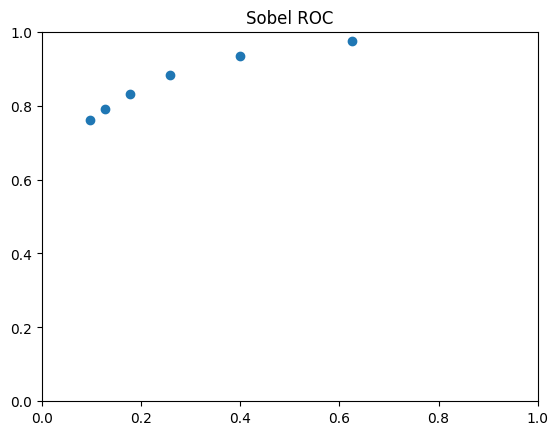

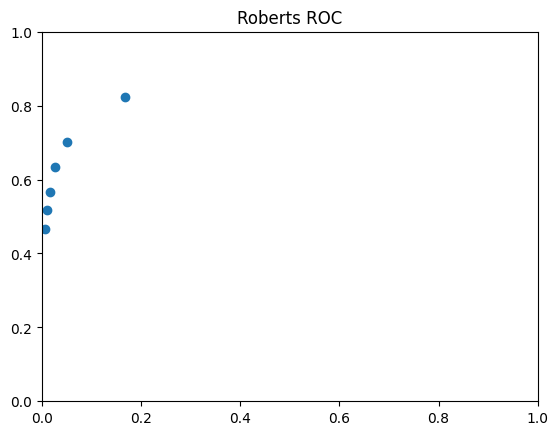

In [385]:
def display_roc(calc, length, title):
    tpr, fpr = get_roc(calc, length)

    plt.scatter(fpr, tpr)
    plt.title(title)
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.show()

display_roc(sobel_calc, len(thresLevels), "Sobel ROC")
display_roc(roberts_calc, len(thresLevels), "Roberts ROC")

#### answer

According to the ROC graphs, it would seem that sobel is slightly better than roberts

## Horse Image (113044)

#### Read and Display original image

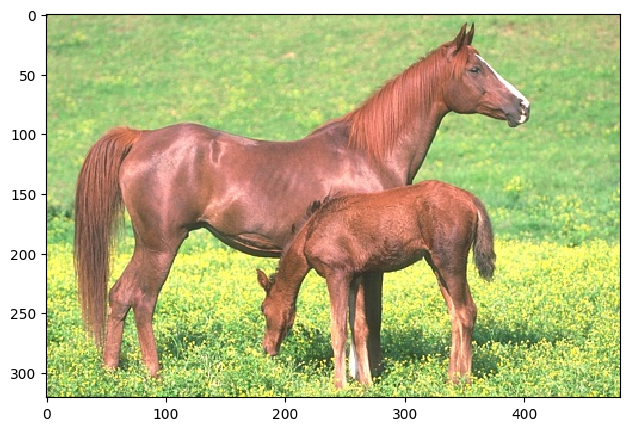

In [386]:
# read input image
X = ski.io.imread('113044.jpg')

# Display it
ski.io.imshow(X)

#### Read the ground truth and display it

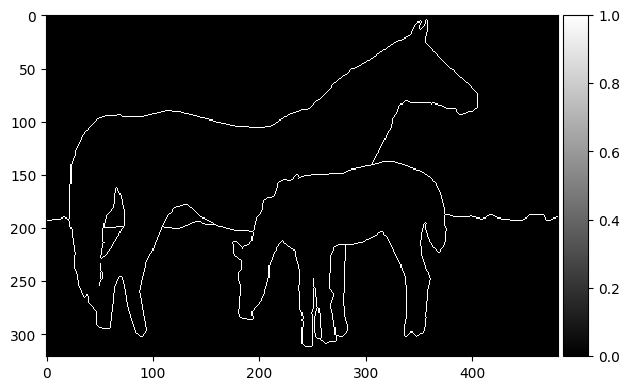

In [387]:
# read the ground-truth edge
annots = loadmat('113044.mat')['groundTruth']
gt = annots[0][0][0][0][1]
ski.io.imshow(gt, cmap="gray")

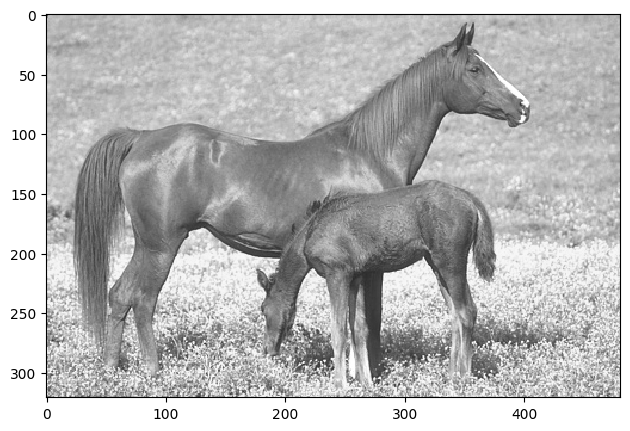

In [388]:
np.unique(gt)

# convert RGB image to grayscale image
imgGray = rgb2gray(X)
ski.io.imshow(imgGray)

#### Apply work

<Figure size 640x480 with 0 Axes>

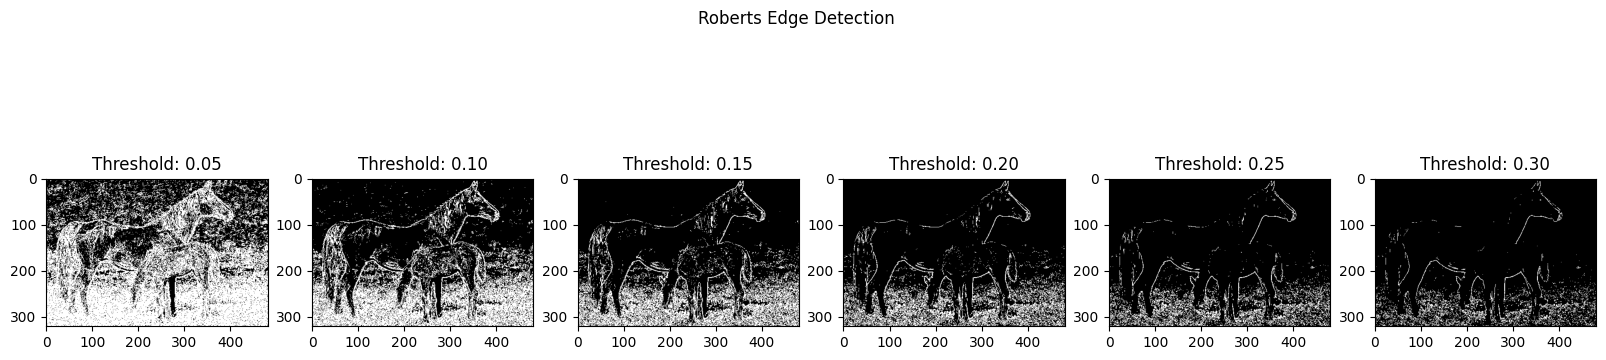

<Figure size 640x480 with 0 Axes>

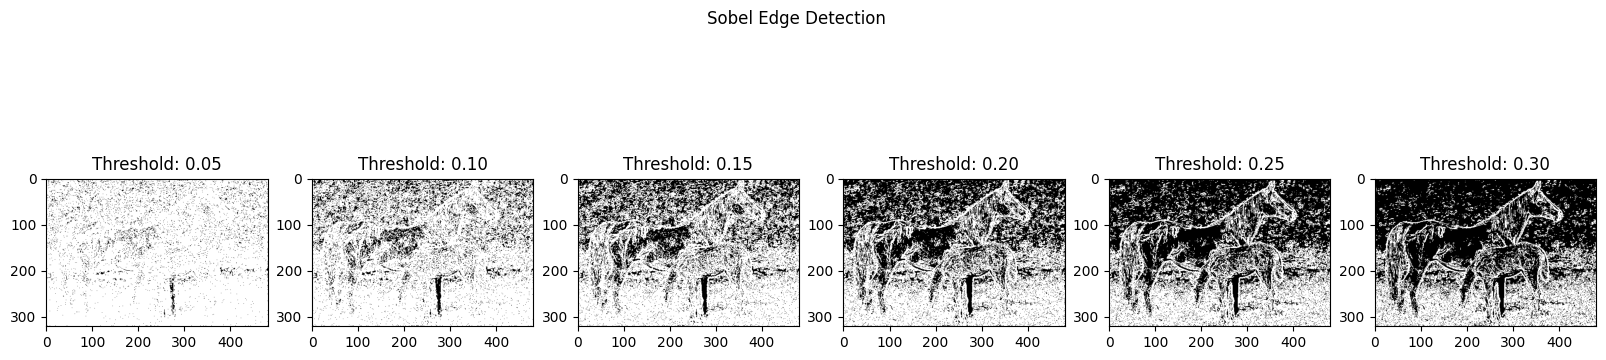

In [389]:
sobRes, robRes = applyThres(imgGray, thresLevels)

display_edges(sobRes, robRes, thresLevels)

In [390]:
sobel_calc = getAllCalcs(sobRes)
roberts_calc = getAllCalcs(robRes)

print("Sobel")
print_calc(sobel_calc, thresLevels)

print("\nRoberts")
print_calc(roberts_calc, thresLevels)

Sobel
T = 0.05:	 TP = 2565	 TN = 8176	 FP = 143629	 FN = 31	 Recall = 98	 Precision = 1	 F-score = 3
T = 0.10:	 TP = 2511	 TN = 26538	 FP = 125267	 FN = 85	 Recall = 96	 Precision = 1	 F-score = 3
T = 0.15:	 TP = 2410	 TN = 47369	 FP = 104436	 FN = 186	 Recall = 92	 Precision = 2	 F-score = 4
T = 0.20:	 TP = 2314	 TN = 66084	 FP = 85721	 FN = 282	 Recall = 89	 Precision = 2	 F-score = 5
T = 0.25:	 TP = 2210	 TN = 80980	 FP = 70825	 FN = 386	 Recall = 85	 Precision = 3	 F-score = 5
T = 0.30:	 TP = 2096	 TN = 92172	 FP = 59633	 FN = 500	 Recall = 80	 Precision = 3	 F-score = 6

Roberts
T = 0.05:	 TP = 2362	 TN = 68053	 FP = 83752	 FN = 234	 Recall = 90	 Precision = 2	 F-score = 5
T = 0.10:	 TP = 2002	 TN = 105694	 FP = 46111	 FN = 594	 Recall = 77	 Precision = 4	 F-score = 7
T = 0.15:	 TP = 1657	 TN = 122073	 FP = 29732	 FN = 939	 Recall = 63	 Precision = 5	 F-score = 9
T = 0.20:	 TP = 1362	 TN = 132067	 FP = 19738	 FN = 1234	 Recall = 52	 Precision = 6	 F-score = 11
T = 0.25:	 TP = 1100

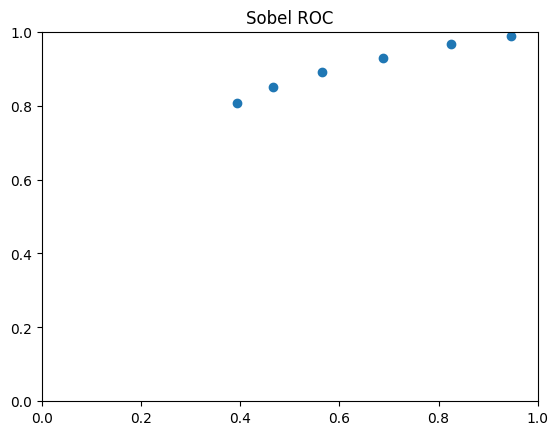

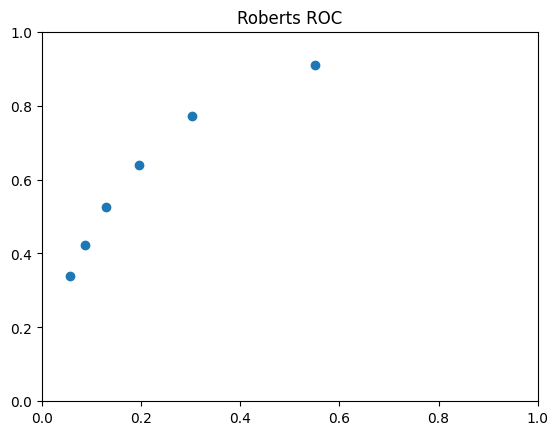

In [391]:
display_roc(sobel_calc, len(thresLevels), "Sobel ROC")
display_roc(roberts_calc, len(thresLevels), "Roberts ROC")


#### Answer

For the horse image, I believe the roberts method is best since there is the FPR seems to be generally lower

## Church image (118035)

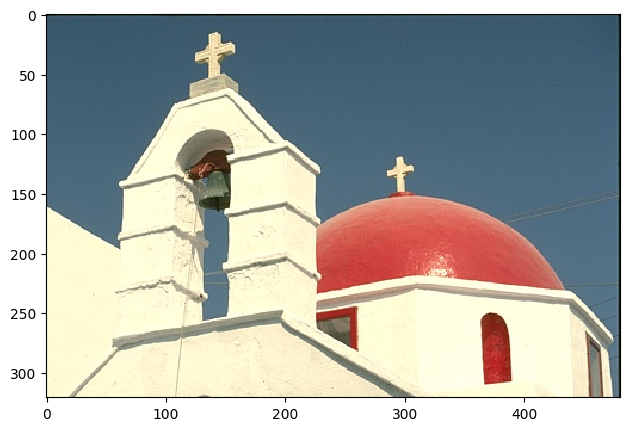

In [392]:
# read input image
X = ski.io.imread('118035.jpg')

# Display it
ski.io.imshow(X)

#### get ground truth and display it

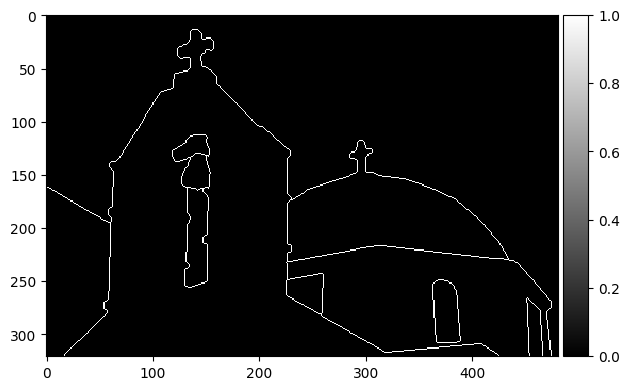

In [393]:
# read the ground-truth edge
annots = loadmat('118035.mat')['groundTruth']
gt = annots[0][0][0][0][1]
ski.io.imshow(gt, cmap="gray")

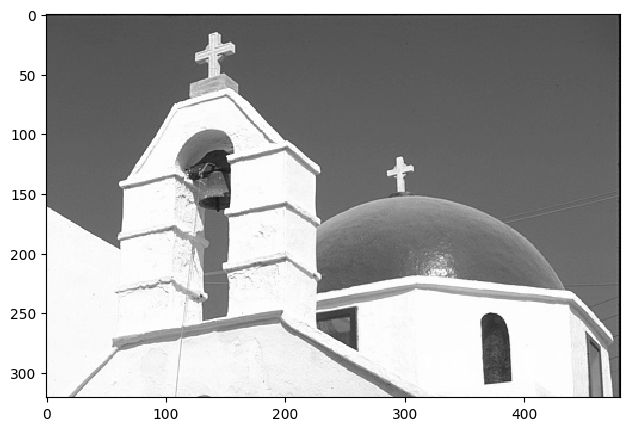

In [394]:
np.unique(gt)

# convert RGB image to grayscale image
imgGray = rgb2gray(X)
ski.io.imshow(imgGray)

#### Apply work

<Figure size 640x480 with 0 Axes>

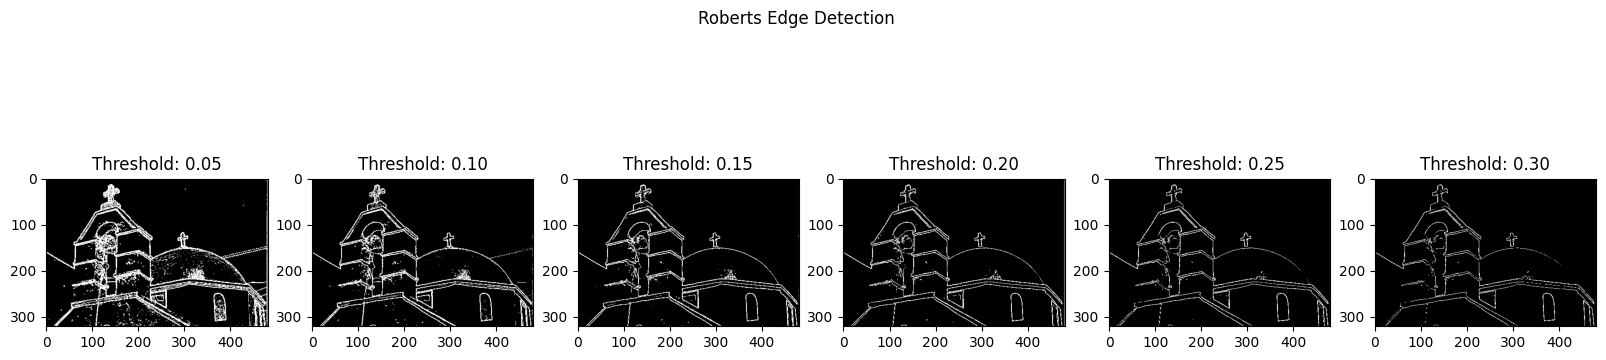

<Figure size 640x480 with 0 Axes>

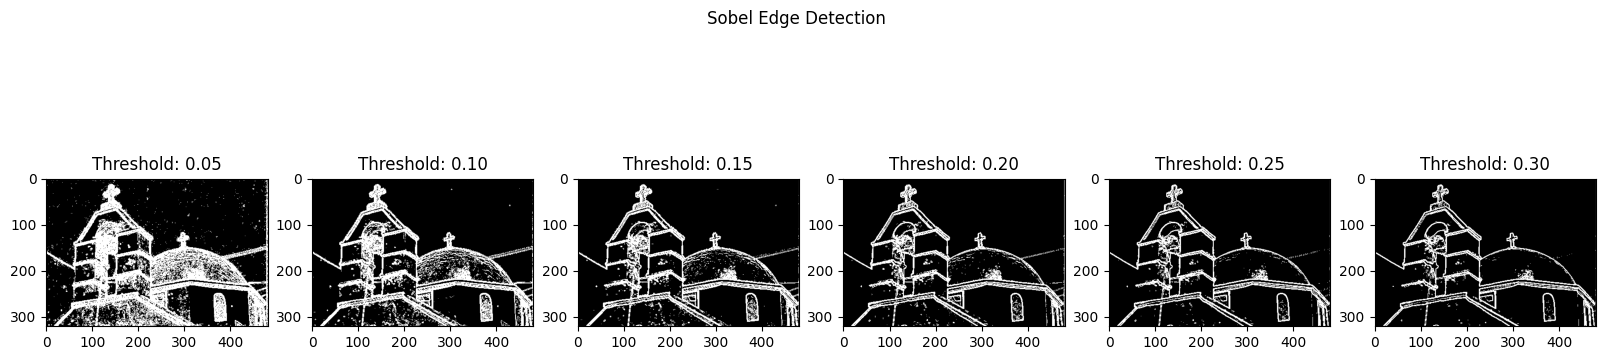

In [395]:
sobRes, robRes = applyThres(imgGray, thresLevels)

display_edges(sobRes, robRes, thresLevels)

In [396]:
sobel_calc = getAllCalcs(sobRes)
roberts_calc = getAllCalcs(robRes)

print("Sobel")
print_calc(sobel_calc, thresLevels)

print("\nRoberts")
print_calc(roberts_calc, thresLevels)

Sobel
T = 0.05:	 TP = 2010	 TN = 106316	 FP = 45909	 FN = 166	 Recall = 92	 Precision = 4	 F-score = 8
T = 0.10:	 TP = 1872	 TN = 121740	 FP = 30485	 FN = 304	 Recall = 86	 Precision = 5	 F-score = 10
T = 0.15:	 TP = 1731	 TN = 128642	 FP = 23583	 FN = 445	 Recall = 79	 Precision = 6	 F-score = 12
T = 0.20:	 TP = 1626	 TN = 132428	 FP = 19797	 FN = 550	 Recall = 74	 Precision = 7	 F-score = 13
T = 0.25:	 TP = 1542	 TN = 134942	 FP = 17283	 FN = 634	 Recall = 70	 Precision = 8	 F-score = 14
T = 0.30:	 TP = 1494	 TN = 136725	 FP = 15500	 FN = 682	 Recall = 68	 Precision = 8	 F-score = 15

Roberts
T = 0.05:	 TP = 1727	 TN = 133209	 FP = 19016	 FN = 449	 Recall = 79	 Precision = 8	 F-score = 15
T = 0.10:	 TP = 1443	 TN = 140908	 FP = 11317	 FN = 733	 Recall = 66	 Precision = 11	 F-score = 19
T = 0.15:	 TP = 1289	 TN = 143885	 FP = 8340	 FN = 887	 Recall = 59	 Precision = 13	 F-score = 21
T = 0.20:	 TP = 1151	 TN = 145598	 FP = 6627	 FN = 1025	 Recall = 52	 Precision = 14	 F-score = 23
T = 

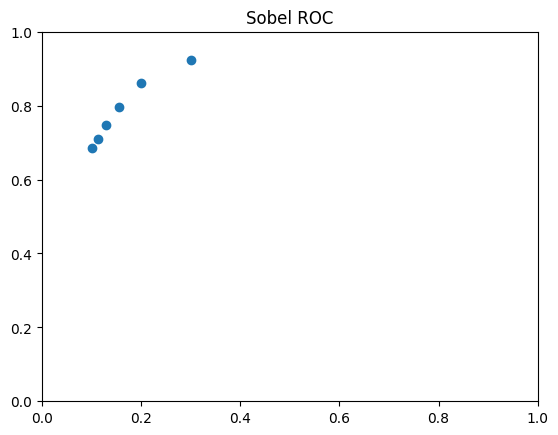

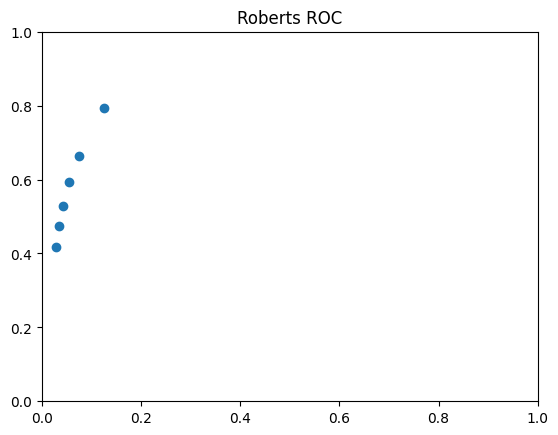

In [397]:
display_roc(sobel_calc, len(thresLevels), "Sobel ROC")
display_roc(roberts_calc, len(thresLevels), "Roberts ROC")

#### Answer

sobel seems to be best. Although sobel's FPR is larger, i believe it is not large enough to outweigh the better TPR

## Bird Image (135069)

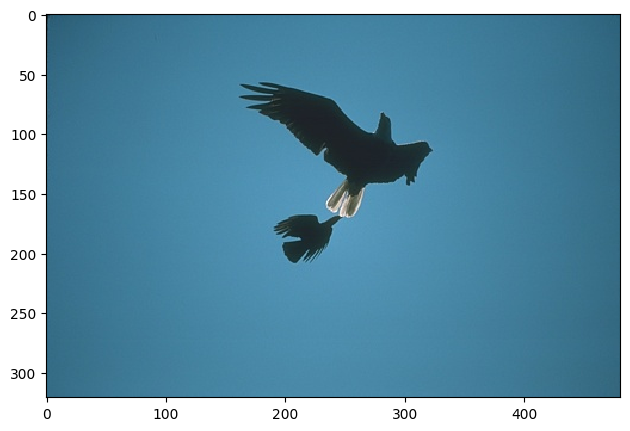

In [398]:
# read input image
X = ski.io.imread('135069.jpg')

# Display it
ski.io.imshow(X)

#### Read ground truth and display it

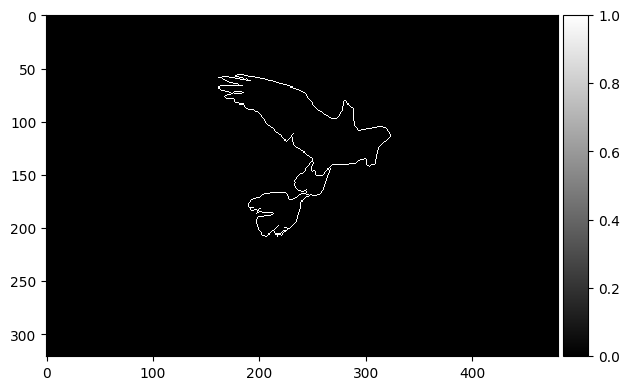

In [399]:
# read the ground-truth edge
annots = loadmat('135069.mat')['groundTruth']
gt = annots[0][0][0][0][1]
ski.io.imshow(gt, cmap="gray")

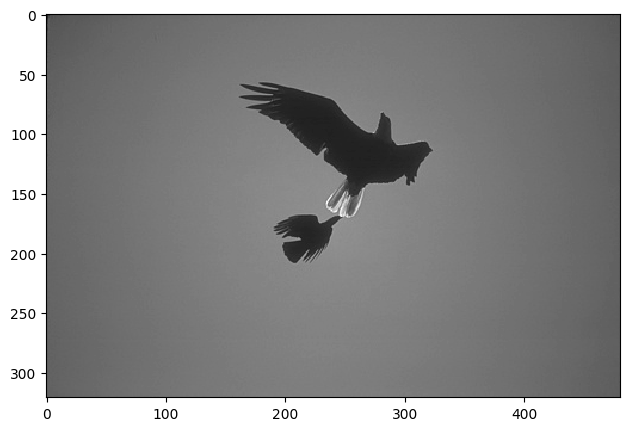

In [400]:
np.unique(gt)

# convert RGB image to grayscale image
imgGray = rgb2gray(X)
ski.io.imshow(imgGray)

#### Apply Work to Image

<Figure size 640x480 with 0 Axes>

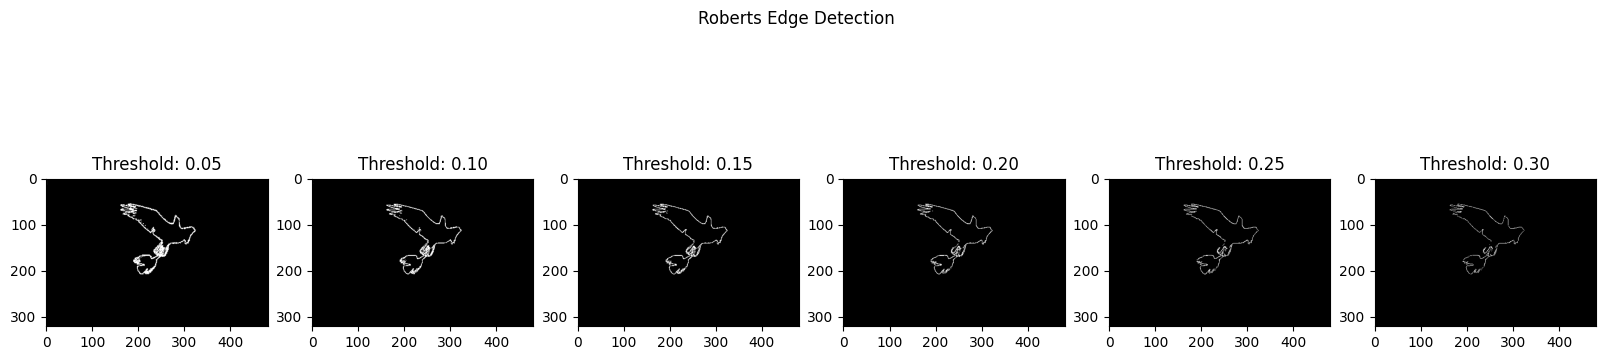

<Figure size 640x480 with 0 Axes>

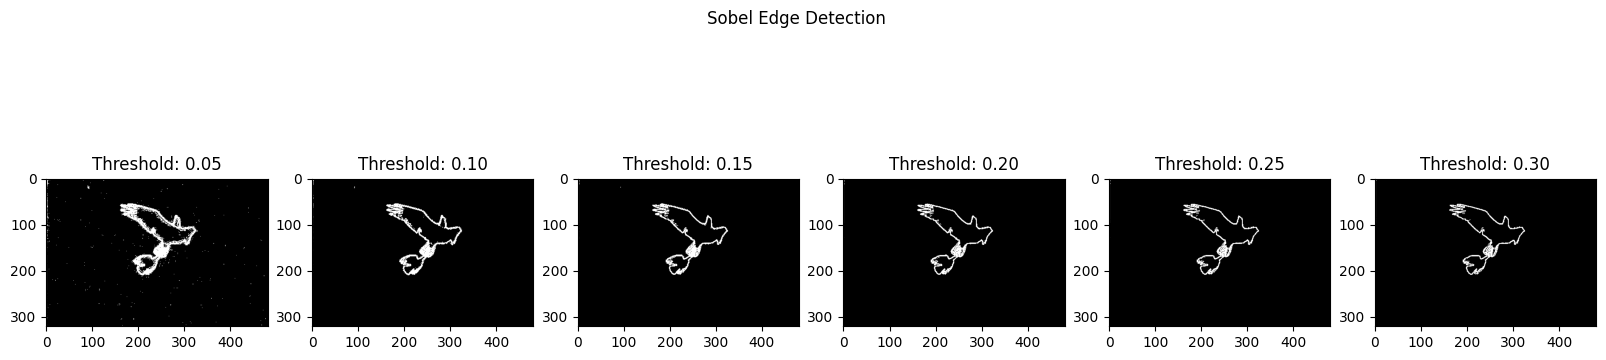

In [401]:
sobRes, robRes = applyThres(imgGray, thresLevels)

display_edges(sobRes, robRes, thresLevels)

In [402]:
sobel_calc = getAllCalcs(sobRes)
roberts_calc = getAllCalcs(robRes)

print("Sobel")
print_calc(sobel_calc, thresLevels)

print("\nRoberts")
print_calc(roberts_calc, thresLevels)

Sobel
T = 0.05:	 TP = 759	 TN = 148207	 FP = 5423	 FN = 12	 Recall = 98	 Precision = 12	 F-score = 21
T = 0.10:	 TP = 749	 TN = 150367	 FP = 3263	 FN = 22	 Recall = 97	 Precision = 18	 F-score = 31
T = 0.15:	 TP = 723	 TN = 150963	 FP = 2667	 FN = 48	 Recall = 93	 Precision = 21	 F-score = 34
T = 0.20:	 TP = 701	 TN = 151258	 FP = 2372	 FN = 70	 Recall = 90	 Precision = 22	 F-score = 36
T = 0.25:	 TP = 682	 TN = 151432	 FP = 2198	 FN = 89	 Recall = 88	 Precision = 23	 F-score = 37
T = 0.30:	 TP = 664	 TN = 151574	 FP = 2056	 FN = 107	 Recall = 86	 Precision = 24	 F-score = 38

Roberts
T = 0.05:	 TP = 724	 TN = 151555	 FP = 2075	 FN = 47	 Recall = 93	 Precision = 25	 F-score = 40
T = 0.10:	 TP = 662	 TN = 152254	 FP = 1376	 FN = 109	 Recall = 85	 Precision = 32	 F-score = 47
T = 0.15:	 TP = 598	 TN = 152565	 FP = 1065	 FN = 173	 Recall = 77	 Precision = 35	 F-score = 49
T = 0.20:	 TP = 537	 TN = 152814	 FP = 816	 FN = 234	 Recall = 69	 Precision = 39	 F-score = 50
T = 0.25:	 TP = 473	 T

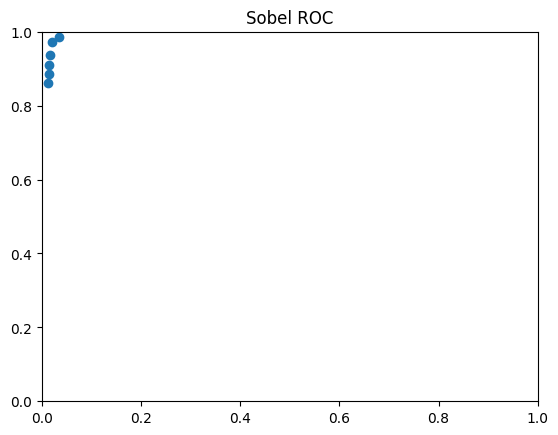

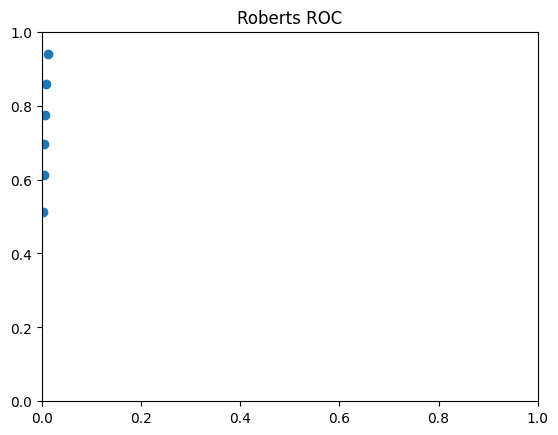

In [403]:
display_roc(sobel_calc, len(thresLevels), "Sobel ROC")
display_roc(roberts_calc, len(thresLevels), "Roberts ROC")

#### Answer

Although both are able to detect the edges well, Sobel's detection is better since the the threshold doesn't matter as much as it does with Roberts

## Pyramid Image (161062)

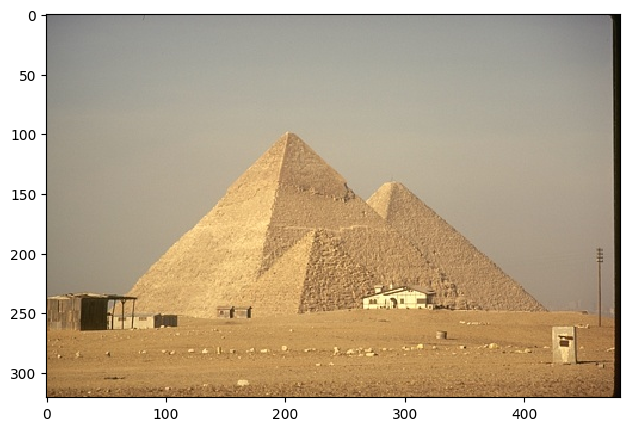

In [404]:
# read input image
X = ski.io.imread('161062.jpg')

# Display it
ski.io.imshow(X)

#### Ground Truth

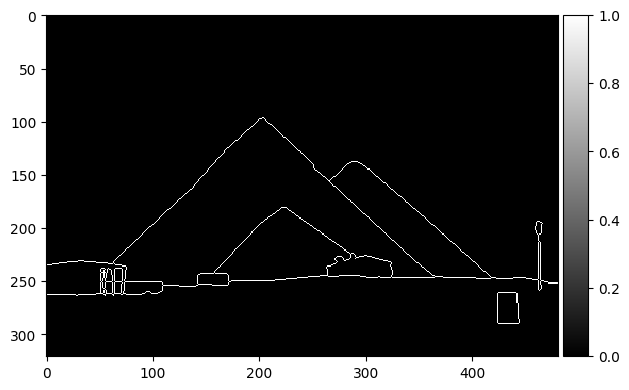

In [405]:
# read the ground-truth edge
annots = loadmat('161062.mat')['groundTruth']
gt = annots[0][0][0][0][1]
ski.io.imshow(gt, cmap="gray")

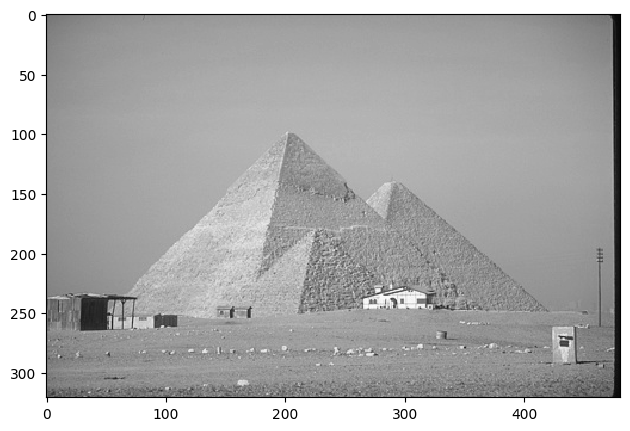

In [406]:
np.unique(gt)

# convert RGB image to grayscale image
imgGray = rgb2gray(X)
ski.io.imshow(imgGray)

#### Apply work to image

<Figure size 640x480 with 0 Axes>

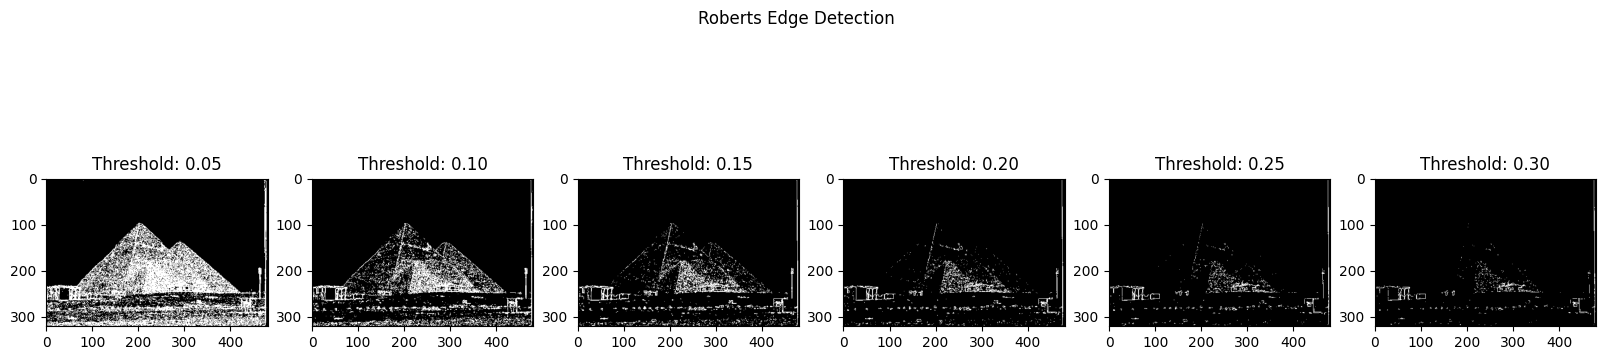

<Figure size 640x480 with 0 Axes>

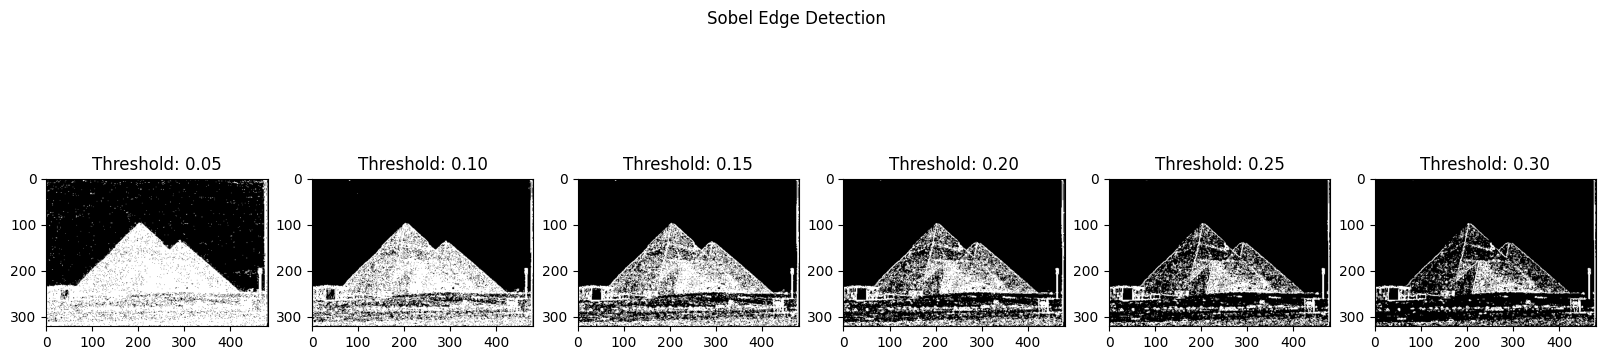

In [407]:
sobRes, robRes = applyThres(imgGray, thresLevels)

display_edges(sobRes, robRes, thresLevels)


In [408]:
sobel_calc = getAllCalcs(sobRes)
roberts_calc = getAllCalcs(robRes)

print("Sobel")
print_calc(sobel_calc, thresLevels)

print("\nRoberts")
print_calc(roberts_calc, thresLevels)


Sobel
T = 0.05:	 TP = 1572	 TN = 89827	 FP = 62854	 FN = 148	 Recall = 91	 Precision = 2	 F-score = 4
T = 0.10:	 TP = 1436	 TN = 102099	 FP = 50582	 FN = 284	 Recall = 83	 Precision = 2	 F-score = 5
T = 0.15:	 TP = 1345	 TN = 113049	 FP = 39632	 FN = 375	 Recall = 78	 Precision = 3	 F-score = 6
T = 0.20:	 TP = 1241	 TN = 121886	 FP = 30795	 FN = 479	 Recall = 72	 Precision = 3	 F-score = 7
T = 0.25:	 TP = 1147	 TN = 128781	 FP = 23900	 FN = 573	 Recall = 66	 Precision = 4	 F-score = 8
T = 0.30:	 TP = 1058	 TN = 133801	 FP = 18880	 FN = 662	 Recall = 61	 Precision = 5	 F-score = 9

Roberts
T = 0.05:	 TP = 1300	 TN = 114467	 FP = 38214	 FN = 420	 Recall = 75	 Precision = 3	 F-score = 6
T = 0.10:	 TP = 940	 TN = 135588	 FP = 17093	 FN = 780	 Recall = 54	 Precision = 5	 F-score = 9
T = 0.15:	 TP = 667	 TN = 144055	 FP = 8626	 FN = 1053	 Recall = 38	 Precision = 7	 F-score = 12
T = 0.20:	 TP = 487	 TN = 147861	 FP = 4820	 FN = 1233	 Recall = 28	 Precision = 9	 F-score = 13
T = 0.25:	 TP = 3

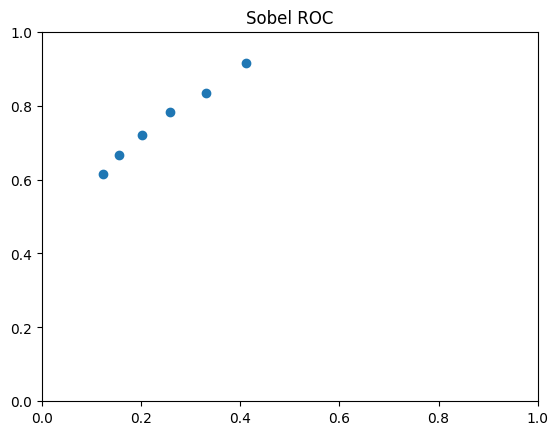

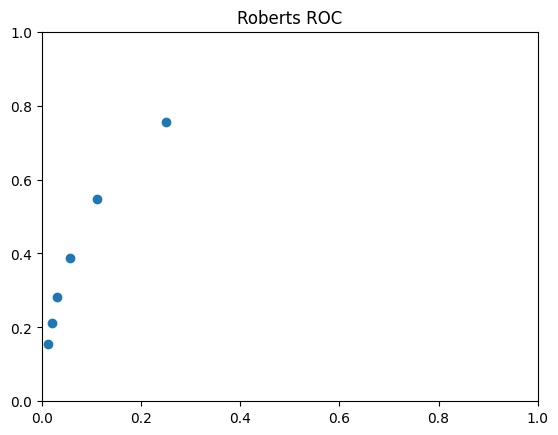

In [409]:
display_roc(sobel_calc, len(thresLevels), "Sobel ROC")
display_roc(roberts_calc, len(thresLevels), "Roberts ROC")

#### Answer

I believe soboel is slightly better even though the FPR is larger